### Load ISM dataset and compute shift vectors

In [1]:
import brighteyes_ism.analysis.APR_lib as apr
import brighteyes_ism.analysis.Graph_lib as gr
import h5py
import numpy as np 
import brighteyes_flim as flim
import brighteyes_ism.analysis.Tools_lib as tools
import brighteyes_ism.dataio.mcs as mcs
import matplotlib.pyplot as plt
from tqdm import tqdm

<KeysViewHDF5 ['configurationFPGA', 'configurationGUI', 'configurationGUI_beforeStart', 'configurationSpadFCSmanager', 'data', 'data_channels_extra']>
(2000, 2000, 81, 25)
(2000, 2000, 25)


C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\lib\site-packages\brighteyes_ism\analysis\Graph_lib.py:544: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(shift[:, 0], shift[:, 1], s=80, c=color, edgecolors='black', cmap=cmap)


[[-3.49 -1.78]
 [-3.22 -0.74]
 [-2.54  0.61]
 [-2.35  2.09]
 [-1.24  3.66]
 [-2.76 -1.88]
 [-2.07 -0.7 ]
 [-1.31  0.45]
 [-0.71  1.63]
 [-0.18  2.92]
 [-1.52 -2.13]
 [-0.64 -1.08]
 [ 0.    0.  ]
 [ 0.55  1.02]
 [ 1.17  2.24]
 [ 0.03 -2.65]
 [ 0.56 -1.47]
 [ 1.11 -0.52]
 [ 1.66  0.34]
 [ 2.55  1.47]
 [ 1.36 -3.39]
 [ 1.96 -2.12]
 [ 2.42 -1.17]
 [ 3.08 -0.38]
 [ 3.99  0.58]]


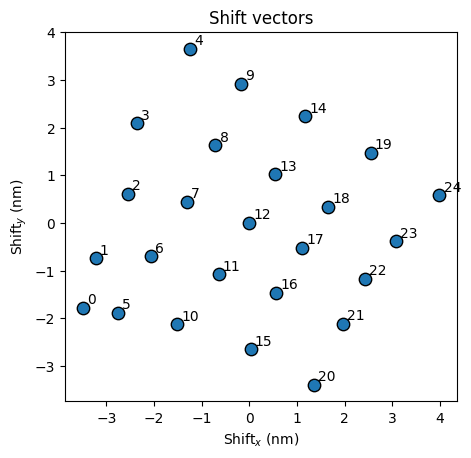

In [2]:
data = h5py.File(r"C:\Users\fdelbufalo\Desktop\images\data-10-04-2024-17-42-38.h5", "r")
print(data.keys())
image = data["data"]
image_4D = image[0, 0,...]
print(image_4D.shape)
image_3d = np.sum(image_4D, axis = -2)
print(image_3d.shape)
shift_vectors, err = apr.ShiftVectors(image_3d, usf = 100, ref = 12)
gr.PlotShiftVectors(shift_vectors)
print (shift_vectors)     

### Do pixel reassignment for each bin of the image

In [3]:
with h5py.File(r"C:\Users\fdelbufalo\Desktop\images\APR_750_data-10-04-2024-17-42-38", 'w') as f:
     x_size, y_size, bin_size, channel_size = 750, 750, image_4D.shape[2], image_4D.shape[3]
# Create an empty dataset with dimensions (x,y,t, ch)
     dataset_shape = (x_size, y_size, bin_size, channel_size)
     h5_dataset = f.create_dataset('data', shape=dataset_shape, dtype=np.uint16)
    

     

     for bin in tqdm(range(image_4D.shape[-2])):
         h5_dataset[:, :, bin, :] = apr.Reassignment(shift_vectors, image_4D[1000:1750, 1200:1950, bin, :], mode = 'interp')
   



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [08:24<00:00,  6.23s/it]


### Sum over channels to get the (x, y, t) image

In [4]:
f = h5py.File(r"C:\Users\fdelbufalo\Desktop\images\APR_750_data-10-04-2024-17-42-38", 'r')
h5_dataset = f["data"]
print(h5_dataset.shape)
#h5_dataset_sum = np.sum(h5_dataset, axis=3)

(750, 750, 81, 25)


In [5]:
h5_dataset_sum = np.sum(h5_dataset, axis=-1)
#image_reassigned = apr.Reassignment(shift_vectors, image[:, :, 0, :])

In [6]:
print(h5_dataset_sum.shape)

(750, 750, 81)


### Sum over the time bins to get the intensity (x, y) image

(750, 750)


(array([  438., 15372., 54163., 59441., 45210., 35544., 28411., 22863.,
        18911., 15468., 13275., 10981.,  9440.,  8216.,  7354.,  6470.,
         5859.,  5161.,  4879.,  4499.,  4173.,  3713.,  3505.,  3240.,
         2886.,  2815.,  2708.,  2487.,  2343.,  2279.,  2117.,  2014.,
         1927.,  1811.,  1746.,  1638.,  1599.,  1542.,  1501.,  1490.,
         1361.,  1354.,  1253.,  1259.,  1257.,  1237.,  1172.,  1120.,
         1067.,  1075.,  1025.,   951.,   943.,   947.,   940.,   911.,
          870.,   876.,   775.,   840.,   844.,   855.,   753.,   774.,
          740.,   724.,   695.,   643.,   713.,   721.,   691.,   683.,
          632.,   657.,   606.,   642.,   639.,   596.,   694.,   634.,
          650.,   594.,   649.,   610.,   631.,   603.,   598.,   649.,
          610.,   606.,   626.,   657.,   639.,   621.,   651.,   666.,
          670.,   677.,   657.,   794.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60., 

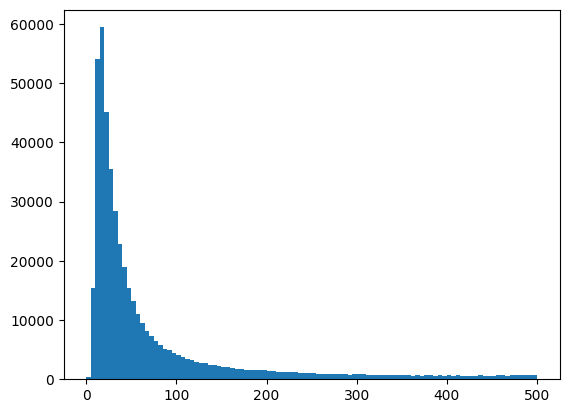

In [7]:

data_histograms = np.sum(h5_dataset_sum, axis = -1)
print(data_histograms.shape)
    
# Plot the histogram of the photon counts in each pixel to see the distribution (e.g. check the level of noise) 
plt.figure()
plt.hist(data_histograms.flatten(), bins = 100, range = (0, 500))

### compute the phasor on the (x, y, t) image for each pixel

In [8]:
#Save the phasors in the image after bin per bin pixel reassignment
flim.phasor_h5(data_path = r"C:\Users\fdelbufalo\Desktop\images\APR_750_data-10-04-2024-17-42-38", data_input = h5_dataset_sum)

c:\users\fdelbufalo\pycharmprojects\brighteyes-flim\src\brighteyes_flim\flism.py:383: RuntimeWarning: invalid value encountered in divide
  out = transform / flux


<Closed HDF5 dataset>

<KeysViewHDF5 ['h5_dataset_phasor_pix']>
(750, 750)


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='g', ylabel='s'>)

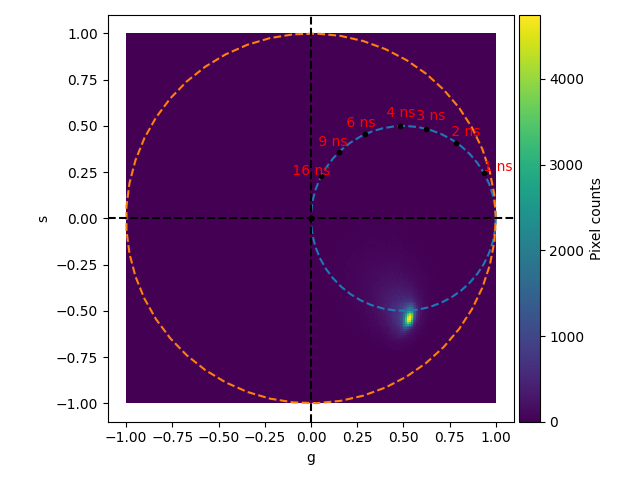

In [9]:
%matplotlib widget

hf_phasors_per_pixel = h5py.File(r"C:\Users\fdelbufalo\Desktop\images\APR_750_data-10-04-2024-17-42-38_phasors_matrix.h5", "r")
print(hf_phasors_per_pixel.keys())

phasors_pix = hf_phasors_per_pixel["h5_dataset_phasor_pix"]  # data with phasors in each pixel
#fasors_pix[1:100, 1:100]
print(phasors_pix.shape)

flim.plot_phasor(phasors_pix[:], bins_2dplot=200, log_scale=False)

### Extract phasor of the IRF for correcting the measured phasors

In [10]:
data_path_irf = r"C:\Users\fdelbufalo\Desktop\images\data-10-04-2024-18-31-53.h5"
data_irf = h5py.File(data_path_irf)

image_irf = data_irf["data"]
data_hist_irf = np.sum(image_irf, axis=(0, 1, 2, 3))
print(data_hist_irf.shape)



(81, 25)


In [11]:
bins_irf = np.sum(data_hist_irf, axis = -1)
print(bins_irf.shape)
phasor_i = flim.calculate_phasor(bins_irf)
print(phasor_i)

(81,)
(-0.47571666388052836-0.8358061776941289j)


### Extract the phasor of the laser and use it to shift the phasors of the data

In [12]:
#load the histogram of the laser trigger signal (26th channel) acquired during the sample's acquisition
import brighteyes_ism.dataio.mcs as mcs
data_path = r"C:\Users\fdelbufalo\Desktop\images\data-10-04-2024-17-42-38.h5"
data_extra, _ = mcs.load(data_path, key="data_channels_extra")
data_laser = data_extra[:, :, :, :, :, 1]
print(data_laser.shape)
data_laser_hist = np.sum(data_laser, axis = (0,1,2,3))
phasor_laser = flim.calculate_phasor(data_laser_hist)
print(phasor_laser)

(1, 1, 2000, 2000, 81)
(-0.8007615062044597-0.5723499255555233j)


In [13]:
#load the histogram of the laser trigger signal (26th channel) acquired with the IRF acquisition
data_path_irf = r"C:\Users\fdelbufalo\Desktop\images\data-10-04-2024-18-31-53.h5"
data_extra_irf, _ = mcs.load(data_path_irf, key="data_channels_extra")
data_laser_irf = data_extra_irf[:, :, :, :, :, 1]
print(data_laser_irf.shape)
data_laser_hist_irf = np.sum(data_laser_irf, axis = (0,1,2,3))
phasor_laser_irf = flim.calculate_phasor(data_laser_hist_irf)
print(phasor_laser_irf)

(1, 1, 500, 500, 81)
(-0.9724567964359583+0.15208946764244183j)


In [14]:
corr = flim.correction_phasor(data_laser_hist, data_laser_hist_irf)
print(corr)
phasor_corrected = phasors_pix * corr / phasor_i

(0.7139297345578988-0.7002173477671687j)


### Display the phasor plot of the data realigned¶

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='g', ylabel='s'>)

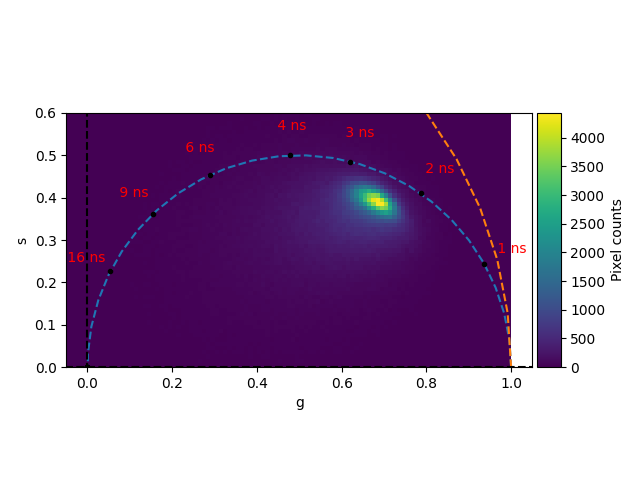

In [15]:
flim.plot_phasor(phasor_corrected, bins_2dplot=200, log_scale=False, quadrant='first')

### Lifetime analysis and FLISM display

In [16]:
tau_phi = flim.calculate_tau_phi(np.real(phasor_corrected), np.imag(phasor_corrected))
print(tau_phi.shape)


(750, 750)


In [17]:
tau_m = flim.calculate_tau_m(np.real(phasor_corrected), np.imag(phasor_corrected))
print(tau_m.shape)

(750, 750)


c:\users\fdelbufalo\pycharmprojects\brighteyes-flim\src\brighteyes_flim\flism.py:413: RuntimeWarning: invalid value encountered in sqrt
  tau_m = np.sqrt((1. / (m ** 2)) - 1) / (2 * np.pi * dfd_freq)


(array([4.30000e+01, 2.80000e+01, 4.20000e+01, 3.90000e+01, 3.80000e+01,
        4.30000e+01, 4.30000e+01, 6.10000e+01, 4.70000e+01, 5.60000e+01,
        5.20000e+01, 6.80000e+01, 7.70000e+01, 8.30000e+01, 9.40000e+01,
        1.17000e+02, 1.43000e+02, 1.74000e+02, 2.20000e+02, 2.69000e+02,
        3.72000e+02, 4.65000e+02, 6.88000e+02, 1.00900e+03, 1.30400e+03,
        1.97800e+03, 3.01900e+03, 4.52500e+03, 6.88700e+03, 1.16060e+04,
        2.00480e+04, 3.43960e+04, 5.73120e+04, 1.03813e+05, 1.11324e+05,
        6.66080e+04, 3.46160e+04, 2.12140e+04, 1.50080e+04, 1.08500e+04,
        8.32800e+03, 6.43600e+03, 5.00800e+03, 4.09700e+03, 3.28200e+03,
        2.79500e+03, 2.25400e+03, 1.87500e+03, 1.65900e+03, 1.33600e+03]),
 array([-6.  , -5.76, -5.52, -5.28, -5.04, -4.8 , -4.56, -4.32, -4.08,
        -3.84, -3.6 , -3.36, -3.12, -2.88, -2.64, -2.4 , -2.16, -1.92,
        -1.68, -1.44, -1.2 , -0.96, -0.72, -0.48, -0.24,  0.  ,  0.24,
         0.48,  0.72,  0.96,  1.2 ,  1.44,  1.68,  1.92

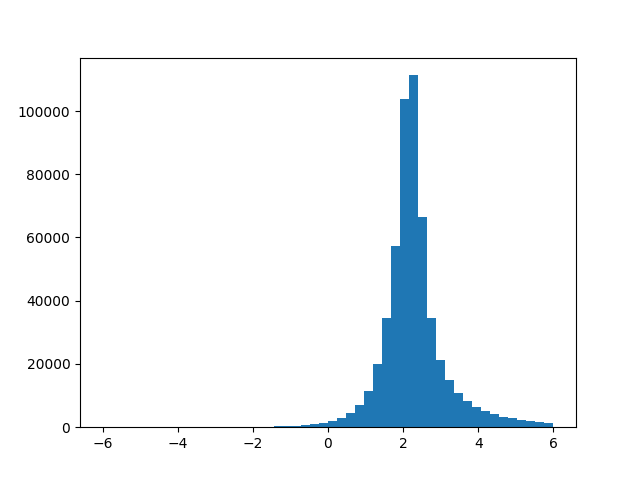

In [18]:
tau_data = 1e9*tau_phi.flatten()

plt.figure()
plt.hist(tau_data, range = (-6, 6), bins = 50)

(array([1.9000e+01, 6.7000e+01, 1.3000e+02, 2.5200e+02, 5.0600e+02,
        9.0400e+02, 1.6210e+03, 3.2880e+03, 7.0960e+03, 1.7199e+04,
        5.5644e+04, 9.4447e+04, 7.4670e+04, 4.9144e+04, 3.6343e+04,
        2.9464e+04, 2.4660e+04, 2.0830e+04, 1.7959e+04, 1.5351e+04,
        1.3082e+04, 1.1133e+04, 9.6660e+03, 8.4540e+03, 7.2950e+03,
        6.5080e+03, 5.5800e+03, 4.8240e+03, 4.3310e+03, 3.7460e+03,
        3.3090e+03, 3.0120e+03, 2.6440e+03, 2.3790e+03, 2.1770e+03,
        1.8930e+03, 1.6940e+03, 1.5170e+03, 1.3930e+03, 1.2610e+03,
        1.0560e+03, 1.0270e+03, 9.2500e+02, 8.5100e+02, 7.8700e+02,
        7.4000e+02, 6.5100e+02, 6.1400e+02, 5.3900e+02, 5.2300e+02]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

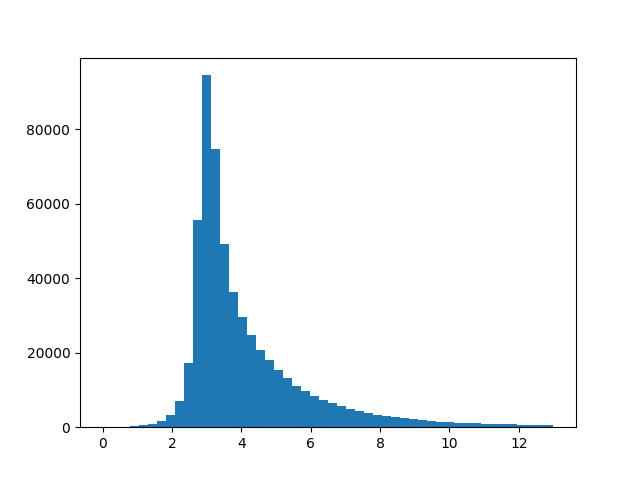

In [19]:
tau_m_data = 1e9*tau_m.flatten()

plt.figure()
plt.hist(tau_m_data, range = (0, 13), bins = 50)

C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\lib\site-packages\brighteyes_ism\analysis\Graph_lib.py:656: RuntimeWarning: invalid value encountered in cast
  idx = (np.floor((variable - self.var_bounds[0]) / (self.var_bounds[1] - self.var_bounds[0]) * N)).astype(int)


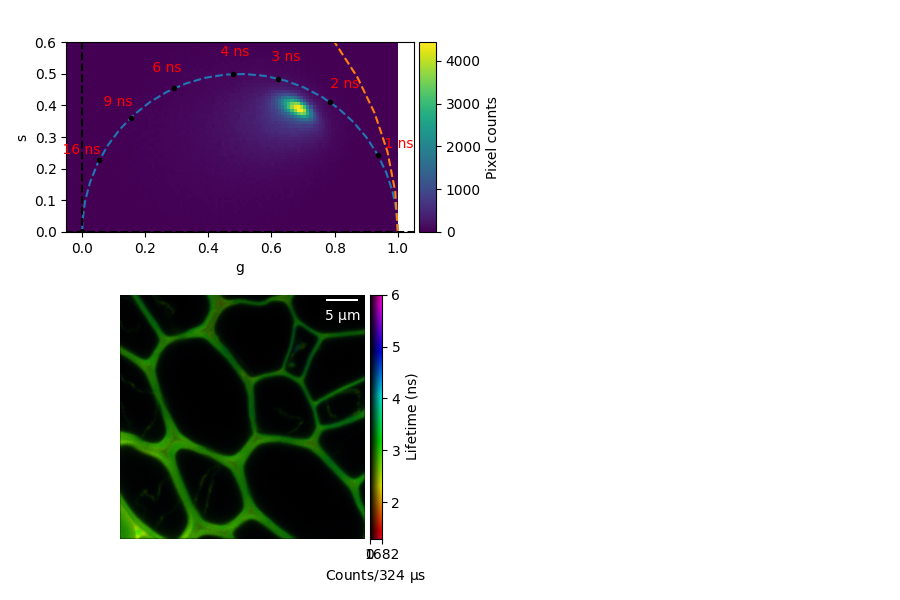

In [20]:
fig = plt.figure(figsize = (9, 6))
gs = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[2:4, 0:2])
flim.plot_phasor(phasor_corrected, bins_2dplot=200, log_scale=False, quadrant='first', fig = fig, ax = ax1)
gr.show_flim(data_histograms, tau_m*1e9, pxsize = 0.05, pxdwelltime = 324, lifetime_bounds = (1.3, 6), fig = fig, ax = ax2)  
fig.tight_layout()
plt.savefig(r"C:\Users\fdelbufalo\Desktop\PDF_processed_images\APR_ups100_convallaria_C_.pdf", dpi = 900)

### Plot intensities of the channels after APR

In [21]:
f = h5py.File(r"C:\Users\fdelbufalo\Desktop\images\APR_750_data-10-04-2024-17-42-38", 'r')
h5_dataset = f["data"]
data_x_y_ch = np.sum(h5_dataset, axis = -2)
print(data_x_y_ch.shape)

(750, 750, 25)


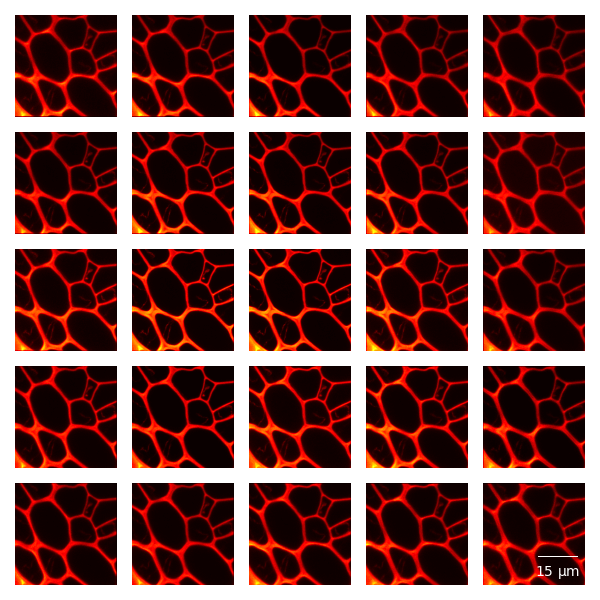

In [25]:
fig = gr.ShowDataset(data_x_y_ch, pxsize = 0.05)

### Plot intensity image (Nx x Ny)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

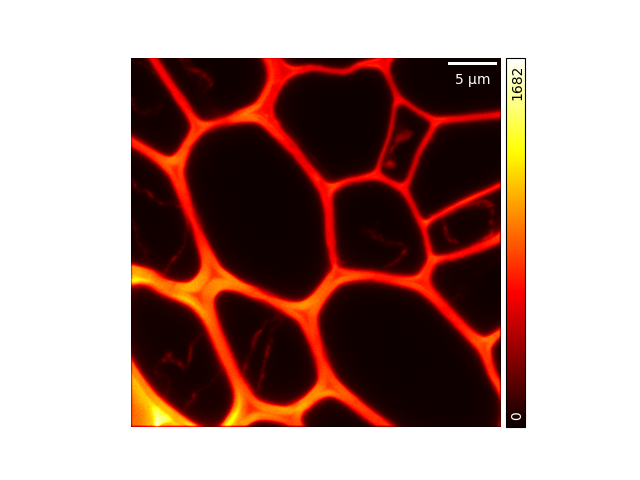

In [23]:
gr.ShowImg(data_histograms, pxsize_x = 0.05)